# Multiclass Classification on the Reuters Dataset

## Project Overview
This notebook demonstrates **multiclass classification** using the Reuters dataset, a collection of short newswire articles categorized by topic. The dataset is a widely used toy dataset for text classification tasks due to its simplicity and versatility.

### About the Reuters Dataset
- **Source**: Published by Reuters in 1986.
- **Purpose**: Categorize news articles by their topic.
- **Structure**:
  - **Number of Topics**: 46 different topics.
  - **Data Imbalance**: Some topics are more represented than others.
  - **Training Examples**: Every topic contains at least 10 examples in the training set.
- **Challenges**: Handling the imbalanced representation of topics across the dataset.

## Objectives
- Preprocess the dataset for text classification.
- Build and evaluate a machine learning model to predict the correct topic for a given article.
- Analyze the model's performance and address class imbalance where necessary.

This project serves as an introduction to text classification and provides hands-on experience working with real-world imbalanced datasets.


In [6]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i in range (len(sequences)):
    for j in range (len(sequences[i])):
      results[i][sequences[i][j]] = 1.
  return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
# Define and compile model
model = models.Sequential()
model.add(layers.Dense(units=64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 647,214 (2.47 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Define a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.4214 - loss: 3.1891 - val_accuracy: 0.6250 - val_loss: 1.8127
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6725 - loss: 1.6301 - val_accuracy: 0.6650 - val_loss: 1.4466
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7368 - loss: 1.2182 - val_accuracy: 0.7210 - val_loss: 1.2139
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7802 - loss: 1.0038 - val_accuracy: 0.7680 - val_loss: 1.0763
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8213 - loss: 0.8200 - val_accuracy: 0.7670 - val_loss: 1.0310
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8459 - loss: 0.6943 - val_accuracy: 0.7990 - val_loss: 0.9556
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8704 - loss: 0.5853 - val_accuracy: 0.7980 - val_loss: 0.9227
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8943 - loss: 0.4887 - val_accuracy: 0.8180 - 

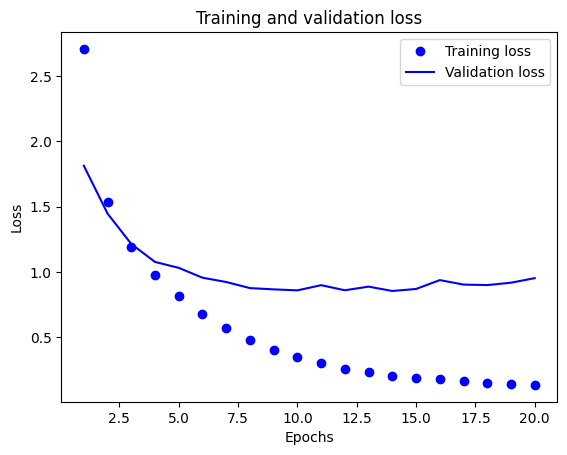

In [12]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()